# Text analysis

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loading data set 
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [29]:
# Choose some topics
categories = ['sci.crypt', 'talk.politics.guns', 'soc.religion.christian', 
              'comp.graphics', 'rec.sport.baseball', 'alt.atheism']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [30]:
# Example of text
print(train.data[3][10:])

is@ntua.gr (Nick C. Fotis)
Subject: (17 Apr 93) Computer Graphics Resource Listing : WEEKLY [part 2/3]
Lines: 1023
Reply-To: nfotis@theseas.ntua.gr (Nick (Nikolaos) Fotis)
Organization: National Technical Univ. of Athens

Archive-name: graphics/resources-list/part2
Last-modified: 1993/04/17


Computer Graphics Resource Listing : WEEKLY POSTING [ PART 2/3 ]
Last Change : 17 April 1993


14. Plotting packages

Gnuplot 3.2
-----------
  It is one of the best 2- and 3-D plotting packages, with
  online help.It's a command-line driven interactive function plotting utility
  for UNIX, MSDOS, Amiga, Archimedes, and VMS platforms (at least!).
  Freely distributed, it supports many terminals, plotters, and printers
  and is easily extensible to include new devices.
  It was posted to comp.sources.misc in version 3.0, plus 2 patches.
  You can practically find it everywhere (use Archie to find a site near you!).
  The comp.graphics.gnuplot newsgroup is devoted to discussion of Gnuplot.

Xvgr and

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# Convert string into vector
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [32]:
# Training 
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

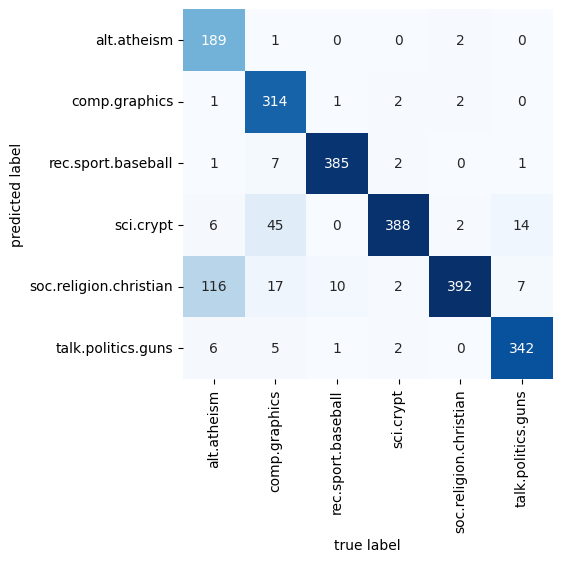

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [34]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [35]:
predict_category('Play the ball')

'rec.sport.baseball'